K-Means Clustering with Scikit-Learn
-----------------------------------------------------

<font color='green'><b>K-means clustering is one of the most widely used unsupervised machine learning algorithms that forms clusters of data based on the similarity between data instances.</b></font> For this particular algorithm to work, the number of clusters has to be defined beforehand. The **`K`** in the K-means refers to the <u>number of clusters</u>.

The K-means algorithm starts by randomly choosing a centroid value for each cluster. After that the algorithm iteratively performs three steps: 

(i) Find the **`Euclidean distance`** between each data instance and centroids of all the clusters.

(ii) Assign the data instances to the cluster of the centroid with **`nearest distance`**. 

(iii) Calculate **`new centroid values`** based on the mean values of the coordinates of all the data instances from the corresponding cluster.

K-means Clustering with Scikit-Learn
-----------------------------------------------------


<font color='red'><b><h3><u>Case Study</u></h3></b></font>

**Context** : Mall_Customers data set is created only for the learning purpose. It teaches you **how to segment customers** . Lets demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

**Content** : You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. **Spending Score** is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement** : You own a `small supermarket` and want to understand your customers like who can be `Target Customers` for a new chain of products you plan to launch. This would also help the marketing team to plan their strategy.

In [12]:
# import the minimum required libraries
import numpy as np   # linear algebra
import pandas as pd  
import matplotlib.pyplot as plt  # Data Visualization 
import seaborn as sns  # Python library for Visualization
import pandas.testing as tm

In [13]:

##-- Import the dataset

dataset = pd.read_csv('Mall_Customers.csv')

##-- As this is unsupervised learning so Label (Output Column) is unknown

dataset.head(10)      # Printing first 10 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [14]:
##-- Check the total rows and colums in the dataset
dataset.shape

(200, 5)

In [15]:
dataset.info()       
##-- there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
##-- Check for Missing values ? 
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
##-- Feature selection for the model
##-- Considering only 2 features (Annual income and Spending Score) 
# and no Label available

customers = dataset.iloc[ : , [3,4]].values
customers[  : 2]

array([[15, 39],
       [15, 81]])

**Building the Model** <br>
The tricky part in KMeans Algorithm is to find rigth **`n_clusters`**. The best method to find n_clusters is using **`Elbow`** method. 

In [18]:
# Building the Model
# the tricky part in KMeans Algorithm is to find rigth => n_clusters. 
# The best method to find n_clusters is using Elbow method

# To decide the optimum cluster number use ELBOW Method 

# -- run the below code
from sklearn.cluster import KMeans
wcss = []

# we always assume the max number of cluster would be 10
# you can judge the number of clusters by doing averaging

# Static code to get max no of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(customers)
    wcss.append(kmeans.inertia_)

# inertia_ is the Sum of Squares within cluster
# WCSS is the sum of squares of the distances of each data point 
# in all clusters to their respective centroids. 
# The idea is to minimise the sum.

wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25095.703209997544,
 21830.04197804944,
 20736.67993892413]

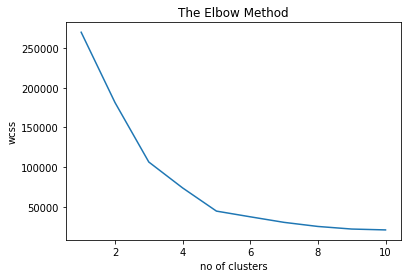

In [19]:
## -- Just run the below code
# Visualizing the ELBOW to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [21]:
# If you zoom out this curve then you will see that last elbow 
# comes at k=5 
# no matter what range we select for example (1,21)
# u will still see the same behaviour 
# but if we chose higher range it is little difficult 
# to visualize the ELBOW.
# that is why we usually prefer range (1,11)
# Finally we got that k=5

## -- Just run the below code

# Model Build
kmeansmodel = KMeans(n_clusters= 5, random_state=0)
y_kmeans = kmeansmodel.fit_predict(customers)

# Now how and where we will deploy this model in production 
# depends on what tool we are using.
# This use case is very common and used in "BFS industry(credit card)" 
# and retail for "Customer Segmentation".

# BFS -> Banking & Finance Sector

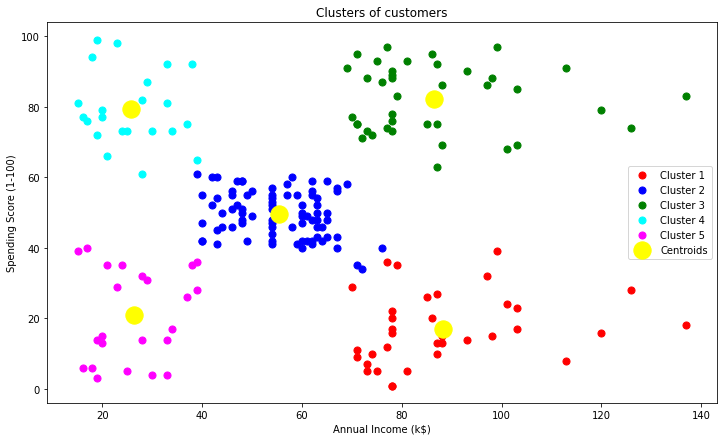

In [22]:
## -- Just run the below code
# Visualizing all the clusters 
plt.figure(figsize=(12,7))

plt.scatter(customers[y_kmeans == 0, 0], customers[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(customers[y_kmeans == 1, 0], customers[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(customers[y_kmeans == 2, 0], customers[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(customers[y_kmeans == 3, 0], customers[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(customers[y_kmeans == 4, 0], customers[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], 
            s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show();

<font color='green'><b>Model Interpretation</b></font> :

**Cluster 1 (Red Color)** -> mid level earning and mid-spending <br>

**Cluster 2 (Blue Color)** -> low earners and high spenders <br>

**Cluster 3 (Green Color)** -> earning high and also spending high **[TARGET SET]**

**Cluster 4 (cyan Color)** -> earning less ,  spending less

**Cluster 5 (magenta Color)** -> Earning more , spending less

<hr>
<font color='green'><b>Outcome of the Analysis : </b></font><br>
We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these <b>Target Customers</b> can easily be convinced to buy newer brand products. <b>Wherein others we can set like once in a week or once in a month. </b>
